Text(0, 0.5, 'Valor (em dezena de milhão)')

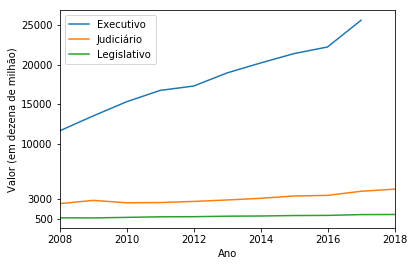

In [4]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

#C1: Ano
#C2: Legislativo
#C3: Judiciário
#C4: Executivo
#Valor: Dotação Atualizada
#Dotação: "valor referente ao crédito autorizado na lei orçamentária anual acrescido de créditos adicionais 
#           abertos ou deduzido de anulações de créditos ao longo do exercício." 
#Fonte: http://dados.gov.br/dataset/despesa-de-pessoal-e-encargos-sociais-da-uniao

despesas = pd.read_excel('Centralizado2.xlsx', names=['Ano', 'Poderes', 'ValorExcel', 'ValorMilhoes', 'Valor'], decimal=',')
despesas = despesas.drop(columns='ValorExcel', axis=1)
despesas = despesas.drop(columns='ValorMilhoes', axis=1)
despesas = despesas.pivot_table(values='Valor', columns='Poderes', index='Ano')
#xaxis = {'title': 'Valor em milhões'}
despesas.plot()
plt.legend(ncol=1)
plt.yticks([500, 3000, 10000, 15000, 20000, 25000])
plt.ylabel('Valor (em dezena de milhão)')




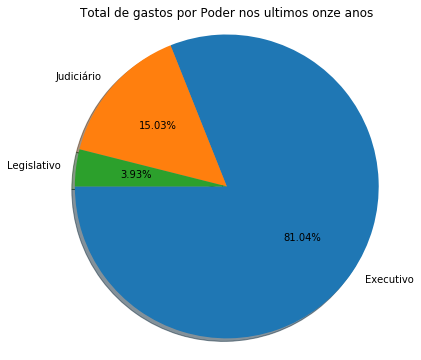

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

despesas = pd.read_excel('Centralizado2.xlsx', names=['Ano', 'Poderes', 'ValorExcel', 'ValorMilhoes', 'Valor'], decimal=',')
#Removendo colunas
despesas = despesas.drop(columns='ValorExcel', axis=1)
despesas = despesas.drop(columns='Valor', axis=1)
despesas = despesas.drop(columns='Ano', axis=1)
#Somando os gastos por Poder
despesas = despesas.groupby(['Poderes'])['ValorMilhoes'].sum()
#Criando Label e Valores pro gráfico
poderes = 'Executivo', 'Judiciário', 'Legislativo'
valores = []
valores.append(despesas[0])
valores.append(despesas[1])
valores.append(despesas[2])
#
#0 = Executivo
#1 = Judiciário
#2 = Legislativo
#
#Montando o gráfico
fig1, ax1 = plt.subplots(figsize=(6, 6))

ax1.pie(valores, labels=poderes, autopct='%1.2f%%', shadow=True, startangle=180)
ax1.set_title('Total de gastos por Poder nos ultimos onze anos')
ax1.axis('equal')
plt.show()
